In [93]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [94]:
base_dir = '/home/shiva/GitRepos/indoor_drone_experimentation/kimera_local_eval/checking_jitter/'
location_to_delta_file = base_dir + 'jaka_script_imu.csv'

In [95]:
df = pd.read_csv(location_to_delta_file)

In [96]:
df.head(10)

,Unnamed: 0,time_deltas_ms,mean_delta,std_delta
0,0,3873.000001,3901.7615,214.791376
1,1,3701.000001,3901.7615,214.791376
2,2,4108.000001,3901.7615,214.791376
3,3,3705.999996,3901.7615,214.791376
4,4,4110.000002,3901.7615,214.791376
5,5,3679.000001,3901.7615,214.791376
6,6,4099.999998,3901.7615,214.791376
7,7,3706.000003,3901.7615,214.791376
8,8,4109.999994,3901.7615,214.791376
9,9,3706.000003,3901.7615,214.791376


In [97]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   time_deltas_ms  10000 non-null  float64
 2   mean_delta      10000 non-null  float64
 3   std_delta       10000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [98]:
df[df['time_deltas_ms'] > 6000.0]

,Unnamed: 0,time_deltas_ms,mean_delta,std_delta
2943,2943,7604.999999,3901.7615,214.791376
3237,3237,7619.999997,3901.7615,214.791376
6185,6185,7580.999998,3901.7615,214.791376
6479,6479,7612.000001,3901.7615,214.791376
9722,9722,7587.999993,3901.7615,214.791376


In [99]:
df['time_deltas_ms'].describe()

count    10000.000000
mean      3901.761500
std        214.802116
min       3346.000005
25%       3706.000003
50%       3904.999998
75%       4104.000000
max       7619.999997
Name: time_deltas_ms, dtype: float64

In [100]:
time_deltas_ms = df['time_deltas_ms'].values
mean_delta = df['mean_delta'].values
stf_delta = df['std_delta'].values

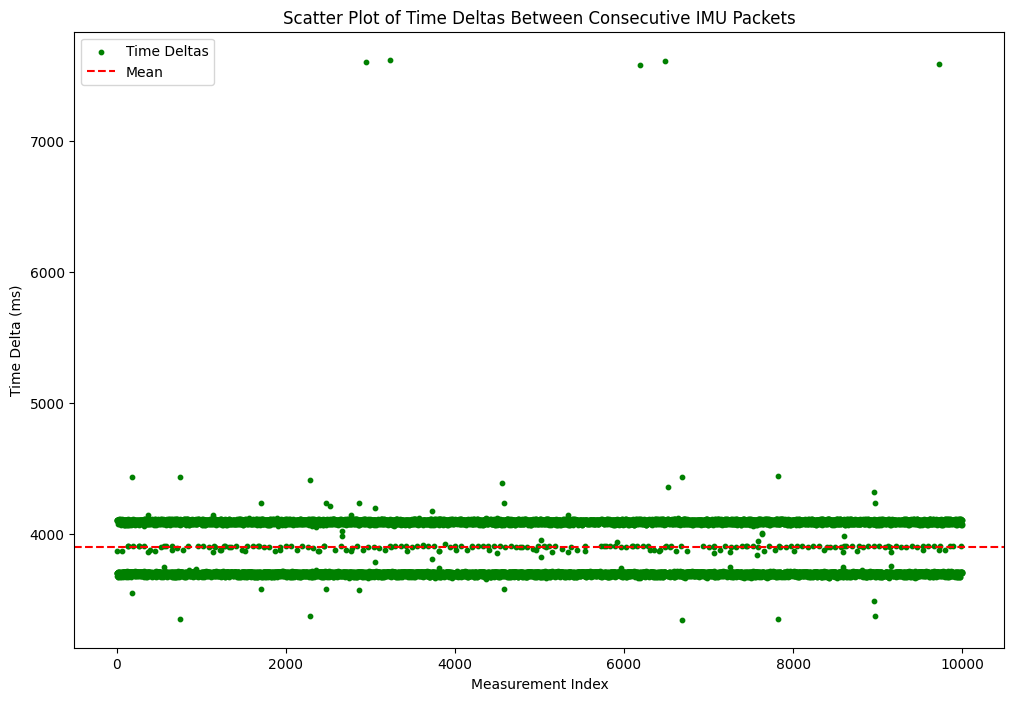

In [101]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(time_deltas_ms)), time_deltas_ms, c='green', label='Time Deltas', s=10)
plt.axhline(mean_delta[0], color='red', linestyle='--', label='Mean', xmin=0, xmax=1)
# plt.text(0, 0, f"Mean: {mean_delta:.2f} ms\nStd: {std_delta:.2f} ms", fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Measurement Index')
plt.ylabel('Time Delta (ms)')
plt.title('Scatter Plot of Time Deltas Between Consecutive IMU Packets')
plt.legend()
plt.show()